In [20]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [21]:
wine=datasets.load_wine()
X_wine=wine.data
y_wine=wine.target

In [22]:
xw = pd.DataFrame(X_wine, columns = ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 
                                      'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 
                                      'Colour Intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
xw

,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Colour Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [23]:
yw = pd.DataFrame(y_wine, columns = ['Target'])

# Normalizar

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:

scaler = StandardScaler()
scaler.fit(wine.data)
x_scaler=scaler.transform(wine.data)
xw_scaler=pd.DataFrame(x_scaler, columns = ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 
                                      'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 
                                      'Colour Intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])

numero de n_clusters: 1 accurracy 0.0
numero de n_clusters: 2 accurracy 0.38872424979619347
numero de n_clusters: 3 accurracy 0.9148795960669529
numero de n_clusters: 4 accurracy 0.7491735027058888
numero de n_clusters: 5 accurracy 0.6372153629852392
numero de n_clusters: 6 accurracy 0.6842384151982096
numero de n_clusters: 7 accurracy 0.5540071052965985
numero de n_clusters: 8 accurracy 0.39553266060117975
numero de n_clusters: 9 accurracy 0.42695727651093207
numero de n_clusters: 10 accurracy 0.37524929663837453


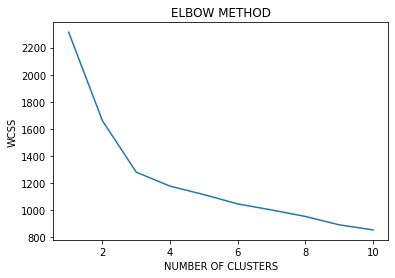

In [26]:
# Ploteo para encontrar el numero de clusters de acuerdo al metodo del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0)
    kmeans.fit(xw_scaler)
    yw_kmeans = kmeans.predict(xw_scaler)
    wcss.append(kmeans.inertia_)
    accuracy =  metrics.adjusted_rand_score(y_wine, yw_kmeans)
    print(f'numero de n_clusters: {i} accurracy {accuracy}')
plt.plot(range(1, 11), wcss)
plt.title('ELBOW METHOD')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

In [27]:
# Aplico el modelo de KMeans
modelw = KMeans(n_clusters = 3, max_iter = 1000)
modelw.fit(xw_scaler)
yw_labels = modelw.labels_
yw_kmeans = modelw.predict(xw_scaler)
print('predicciones ', yw_kmeans)
yw_kmeans_df = pd.DataFrame(yw_kmeans, columns = ['Prediction'])


predicciones  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [28]:
accuracyw =  metrics.adjusted_rand_score(y_wine, yw_kmeans)
print(accuracyw)

0.8974949815093207


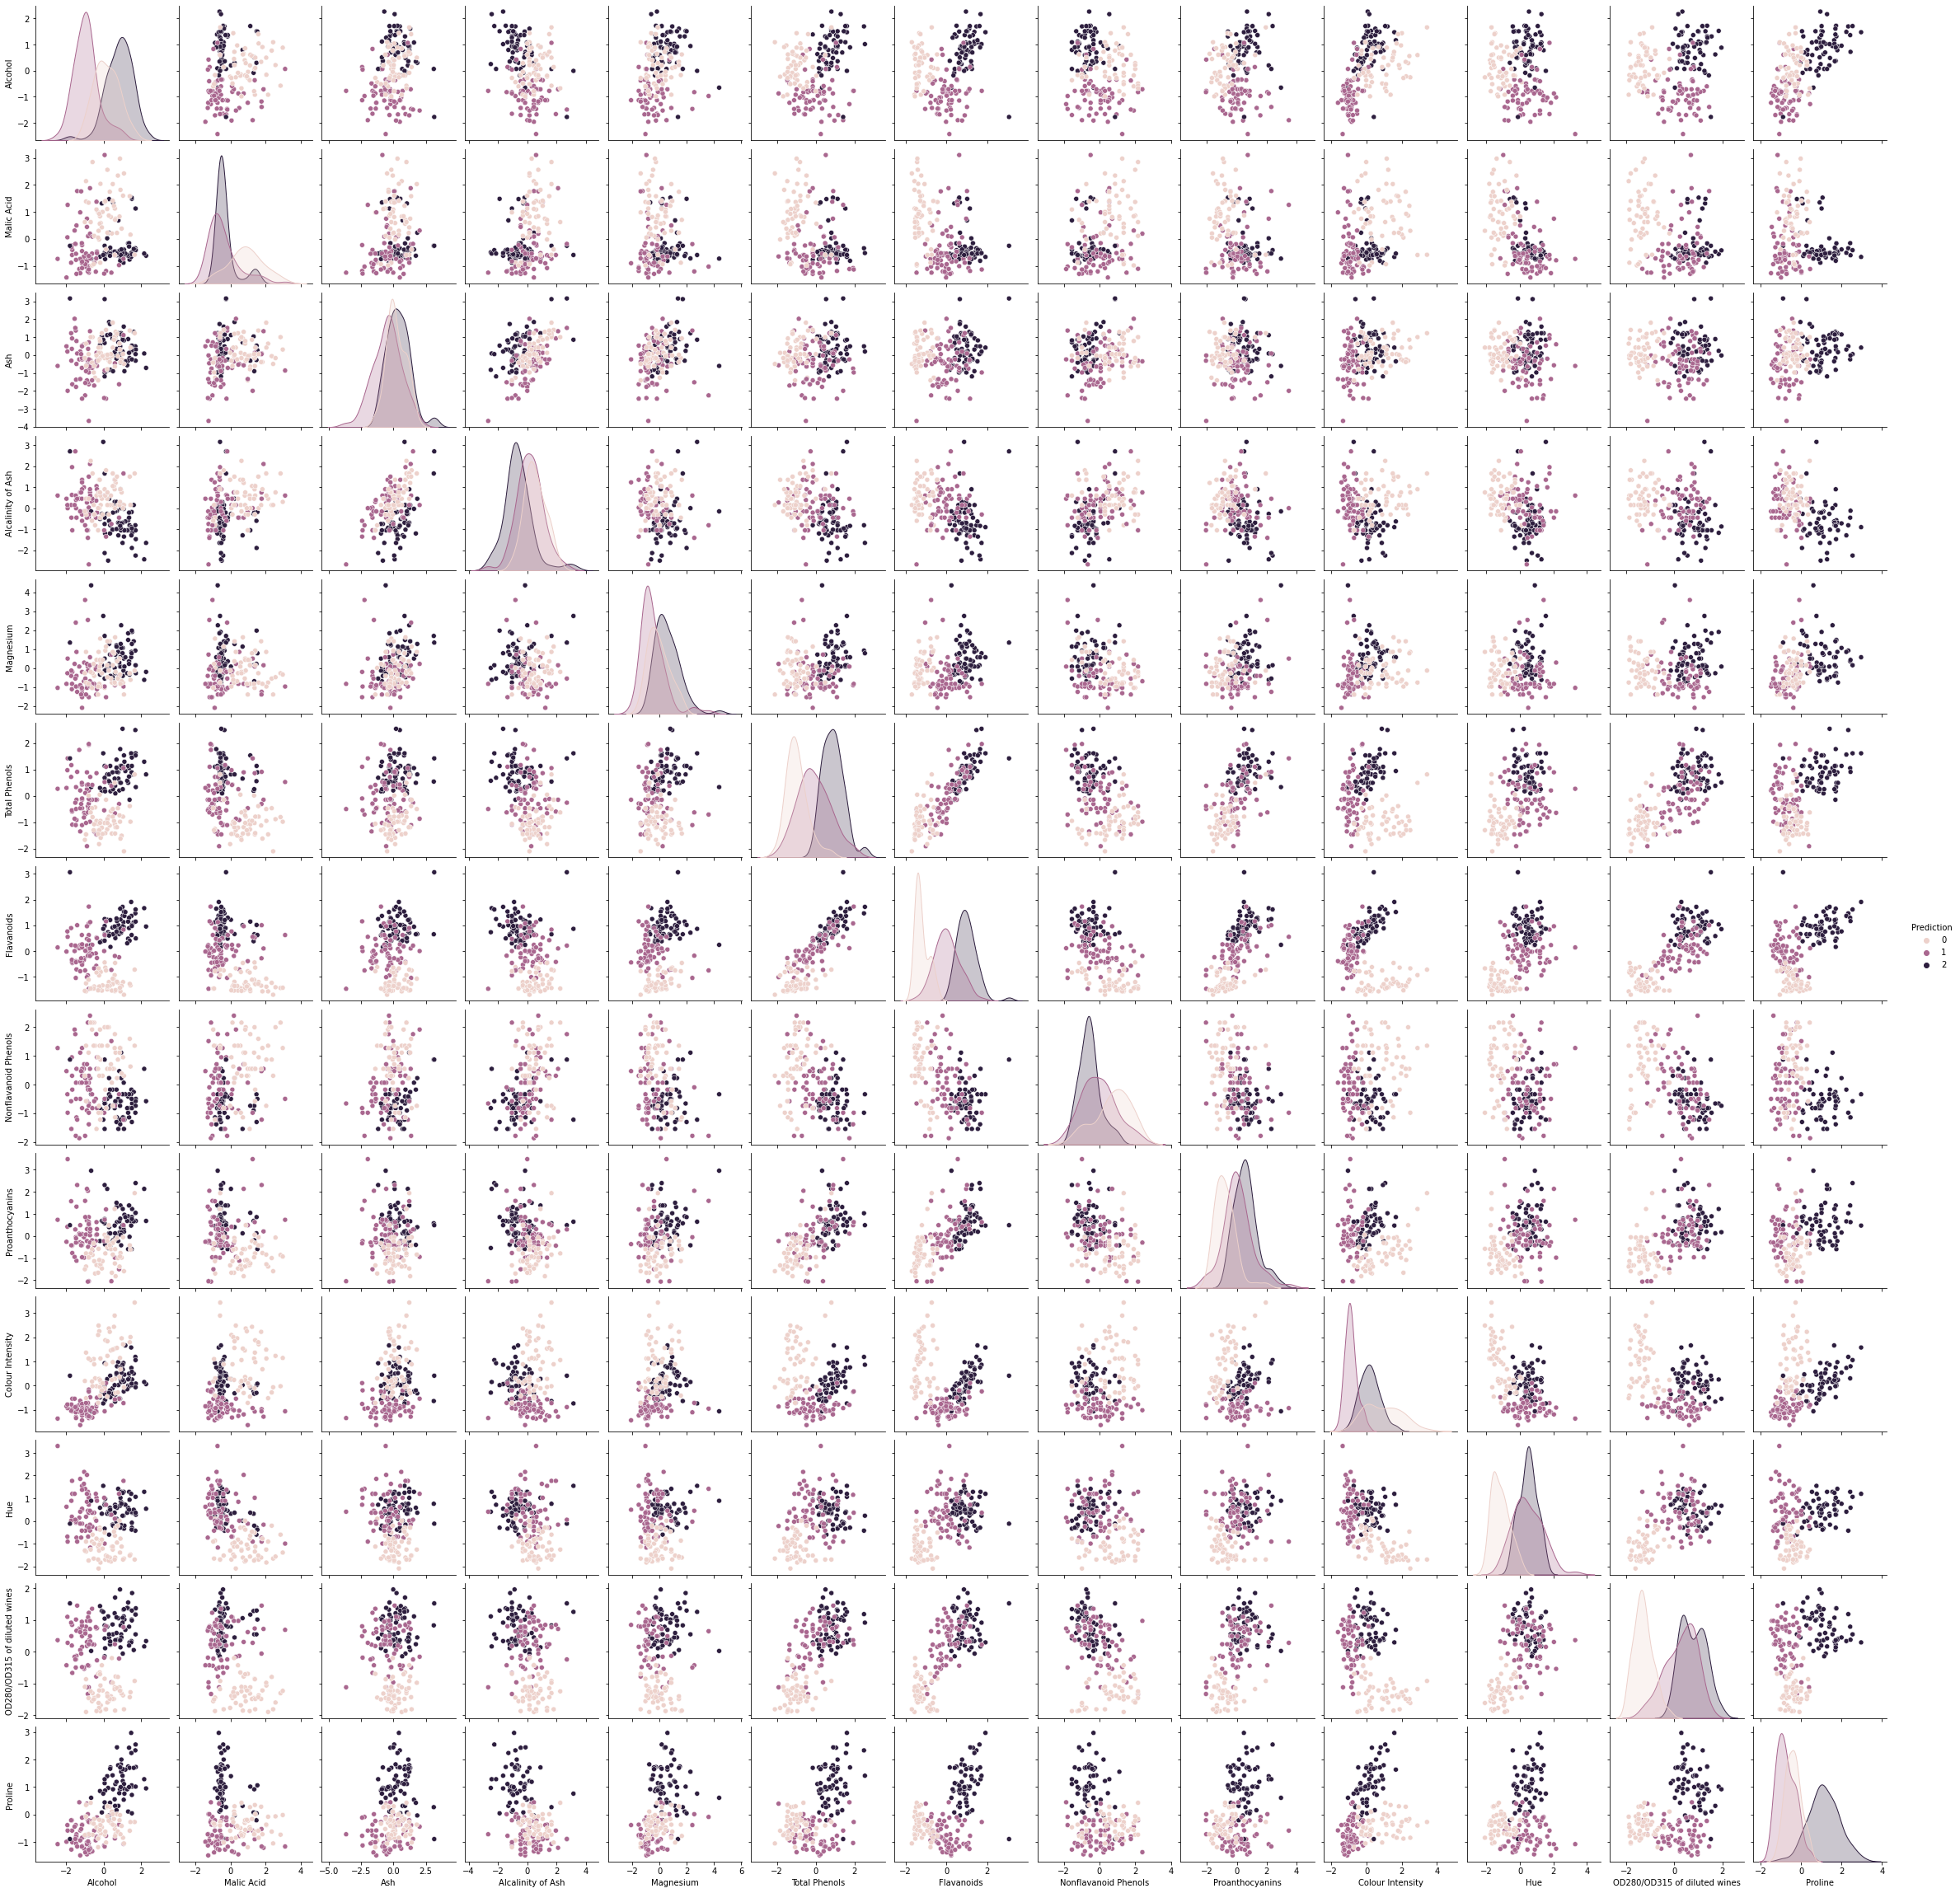

In [30]:
# Concateno el dataset de entrada con el de la prediccion
Z = pd.concat([xw_scaler, yw_kmeans_df],axis=1)

# Grafico para ver relación de las features con respecto a las 
# valores de la predicción, poniendo color según (0,1,2) 
# considerando las tres clases.
sns.pairplot(Z, hue = 'Prediction')